In [5]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from datetime import datetime 
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from pandas import Series,DataFrame
import pandas_datareader as pdr
from __future__ import division
pd.options.display.float_format = '{:.2f}'.format

from pandas_datareader.data import get_data_stooq

sns.set_style('whitegrid')
%matplotlib inline

from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [39]:
import pandas_datareader.data as web
tech_list=['AAPL','GOOG','MSFT','AMZN']
end=datetime.now()
start=datetime(end.year-1,end.month,end.day)
for stock in tech_list:
    globals()[stock] = get_data_stooq(stock,start,end)
# I used get_data_stooq instead of yahoo and no longer got an error
snoopy=get_data_stooq("^SPX",start,end)

In [73]:
AAPL

,Open,High,Low,Close,Volume
Date,,,,,
2023-04-14,164.59,166.32,163.82,165.21,49386480.00
2023-04-13,161.63,165.80,161.42,165.56,68445649.00
2023-04-12,161.22,162.06,159.78,160.10,50133062.00
2023-04-11,162.35,162.36,160.51,160.80,47644217.00
2023-04-10,161.42,162.03,160.08,162.03,47716882.00
...,...,...,...,...,...
2022-04-22,165.71,167.11,160.77,161.06,85266428.97
2022-04-21,168.15,170.76,165.17,165.67,87622383.28
2022-04-20,168.00,168.12,165.36,166.47,68237125.91


In [41]:
snoopy.describe()

,Open,High,Low,Close,Volume
count,250.00,250.00,250.00,250.00,250.00
mean,3968.38,4000.96,3934.18,3968.86,2475218292.45
std,167.23,164.42,167.84,167.01,527630751.26
min,3520.37,3608.34,3491.58,3577.03,901913979.00
25%,3852.99,3890.09,3816.12,3854.76,2148473933.25
50%,3966.05,4000.94,3936.86,3969.82,2400442273.00
75%,4084.82,4117.01,4062.08,4090.45,2669449747.00
max,4489.17,4512.94,4448.76,4462.21,5743241303.00


In [42]:
snoopy.describe()

,Open,High,Low,Close,Volume
count,250.00,250.00,250.00,250.00,250.00
mean,3968.38,4000.96,3934.18,3968.86,2475218292.45
std,167.23,164.42,167.84,167.01,527630751.26
min,3520.37,3608.34,3491.58,3577.03,901913979.00
25%,3852.99,3890.09,3816.12,3854.76,2148473933.25
50%,3966.05,4000.94,3936.86,3969.82,2400442273.00
75%,4084.82,4117.01,4062.08,4090.45,2669449747.00
max,4489.17,4512.94,4448.76,4462.21,5743241303.00


In [43]:
snoopy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-04-14 to 2022-04-18
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    250 non-null    float64
 1   High    250 non-null    float64
 2   Low     250 non-null    float64
 3   Close   250 non-null    float64
 4   Volume  250 non-null    float64
dtypes: float64(5)
memory usage: 11.7 KB


<AxesSubplot:xlabel='Date'>

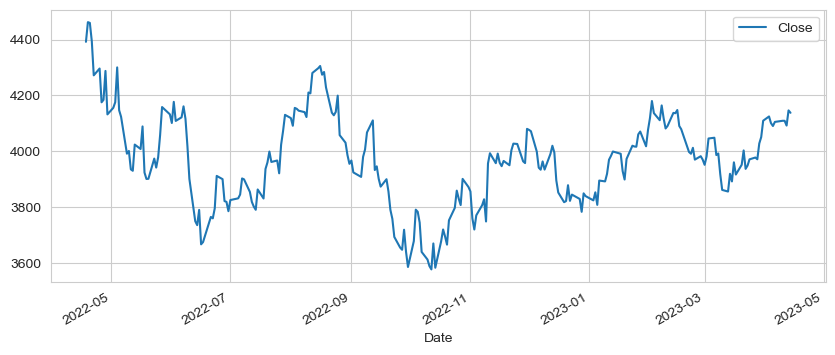

In [44]:
snoopy.Close.plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

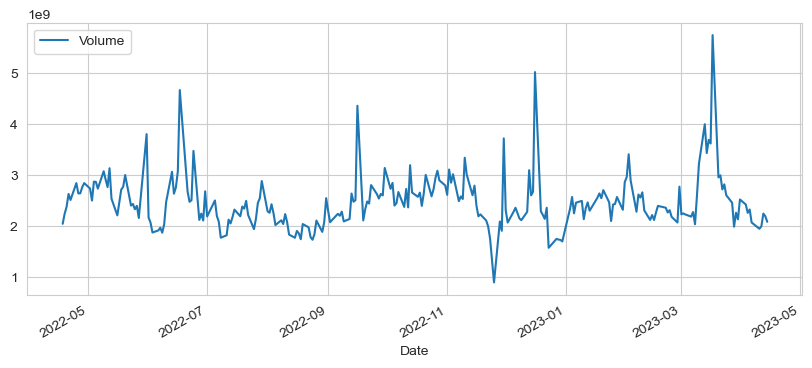

In [45]:
snoopy.Volume.plot(legend=True,figsize=(10,4))

In [48]:
ma_day =[10,20,30]
for ma in ma_day:
    column_name='MA for %s days' %(str(ma))
    snoopy[column_name]=snoopy.Close.rolling(window=ma).mean()

<AxesSubplot:xlabel='Date'>

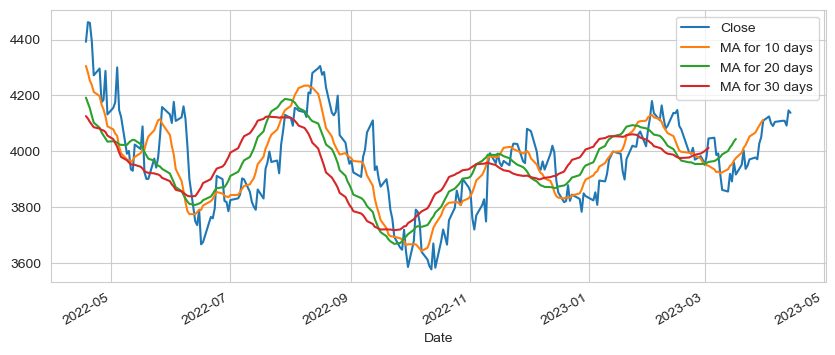

In [52]:
snoopy[['Close','MA for 10 days','MA for 20 days','MA for 30 days']].plot(subplots=False,figsize=(10,4))

In [57]:
snoopy['daily_return']=snoopy.Close.pct_change()

<AxesSubplot:xlabel='Date'>

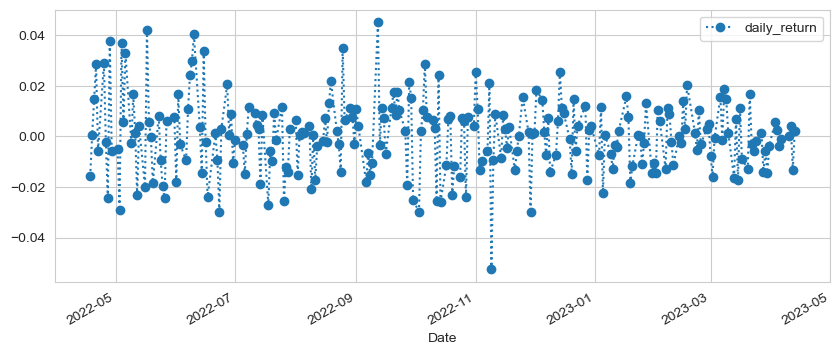

In [61]:
snoopy['daily_return'].plot(figsize=(10,4),legend=True,linestyle=':',marker='o')

<AxesSubplot:xlabel='daily_return', ylabel='Density'>

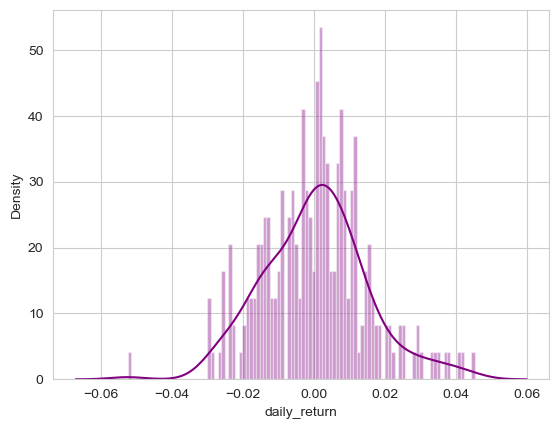

In [63]:
sns.distplot(snoopy['daily_return'].dropna(),bins=100,color='purple')

<AxesSubplot:>

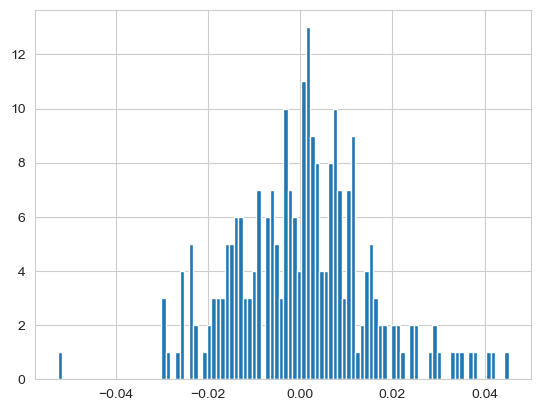

In [64]:
snoopy['daily_return'].hist(bins=100)

In [71]:
closing_df=get_data_stooq(tech_list,start,end)['Close']
closing_df['snoopy']=snoopy.Close

In [72]:
closing_df

Symbols,AAPL,GOOG,MSFT,AMZN,snoopy
Date,,,,,
2023-04-14,165.21,109.46,286.14,102.51,4137.64
2023-04-13,165.56,108.19,289.84,102.40,4146.22
2023-04-12,160.10,105.22,283.49,97.83,4091.95
2023-04-11,160.80,106.12,282.83,99.92,4108.94
2023-04-10,162.03,106.95,289.39,102.17,4109.11
...,...,...,...,...,...
2022-04-22,161.06,119.61,272.05,144.35,4271.78
2022-04-21,165.67,124.94,278.78,148.30,4393.66
2022-04-20,166.47,128.25,284.29,154.00,4459.45


In [76]:
tech_rets=closing_df.pct_change()
tech_rets

Symbols,AAPL,GOOG,MSFT,AMZN,snoopy
Date,,,,,
2023-04-14,NaN,NaN,NaN,NaN,NaN
2023-04-13,0.00,-0.01,0.01,-0.00,0.00
2023-04-12,-0.03,-0.03,-0.02,-0.04,-0.01
2023-04-11,0.00,0.01,-0.00,0.02,0.00
2023-04-10,0.01,0.01,0.02,0.02,0.00
...,...,...,...,...,...
2022-04-22,-0.01,-0.03,-0.02,-0.01,-0.01
2022-04-21,0.03,0.04,0.02,0.03,0.03
2022-04-20,0.00,0.03,0.02,0.04,0.01


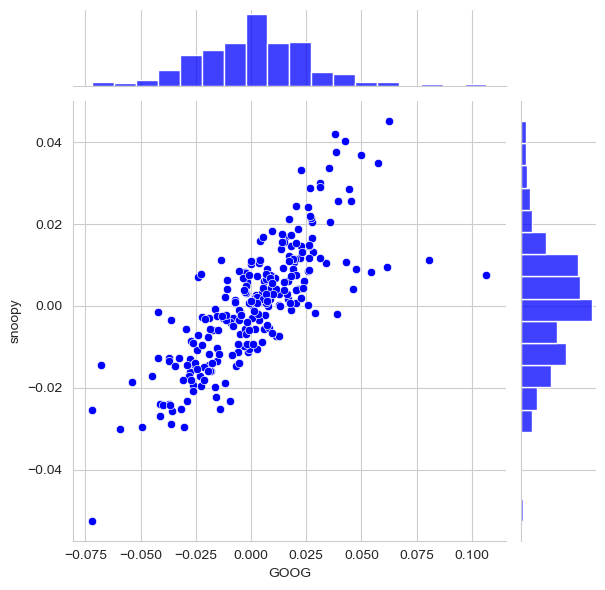

In [81]:
sns.jointplot(x="GOOG", y="snoopy",kind='scatter',color='blue',data=tech_rets)

In [82]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN,snoopy
Date,,,,,
2023-04-14,NaN,NaN,NaN,NaN,NaN
2023-04-13,0.00,-0.01,0.01,-0.00,0.00
2023-04-12,-0.03,-0.03,-0.02,-0.04,-0.01
2023-04-11,0.00,0.01,-0.00,0.02,0.00
2023-04-10,0.01,0.01,0.02,0.02,0.00


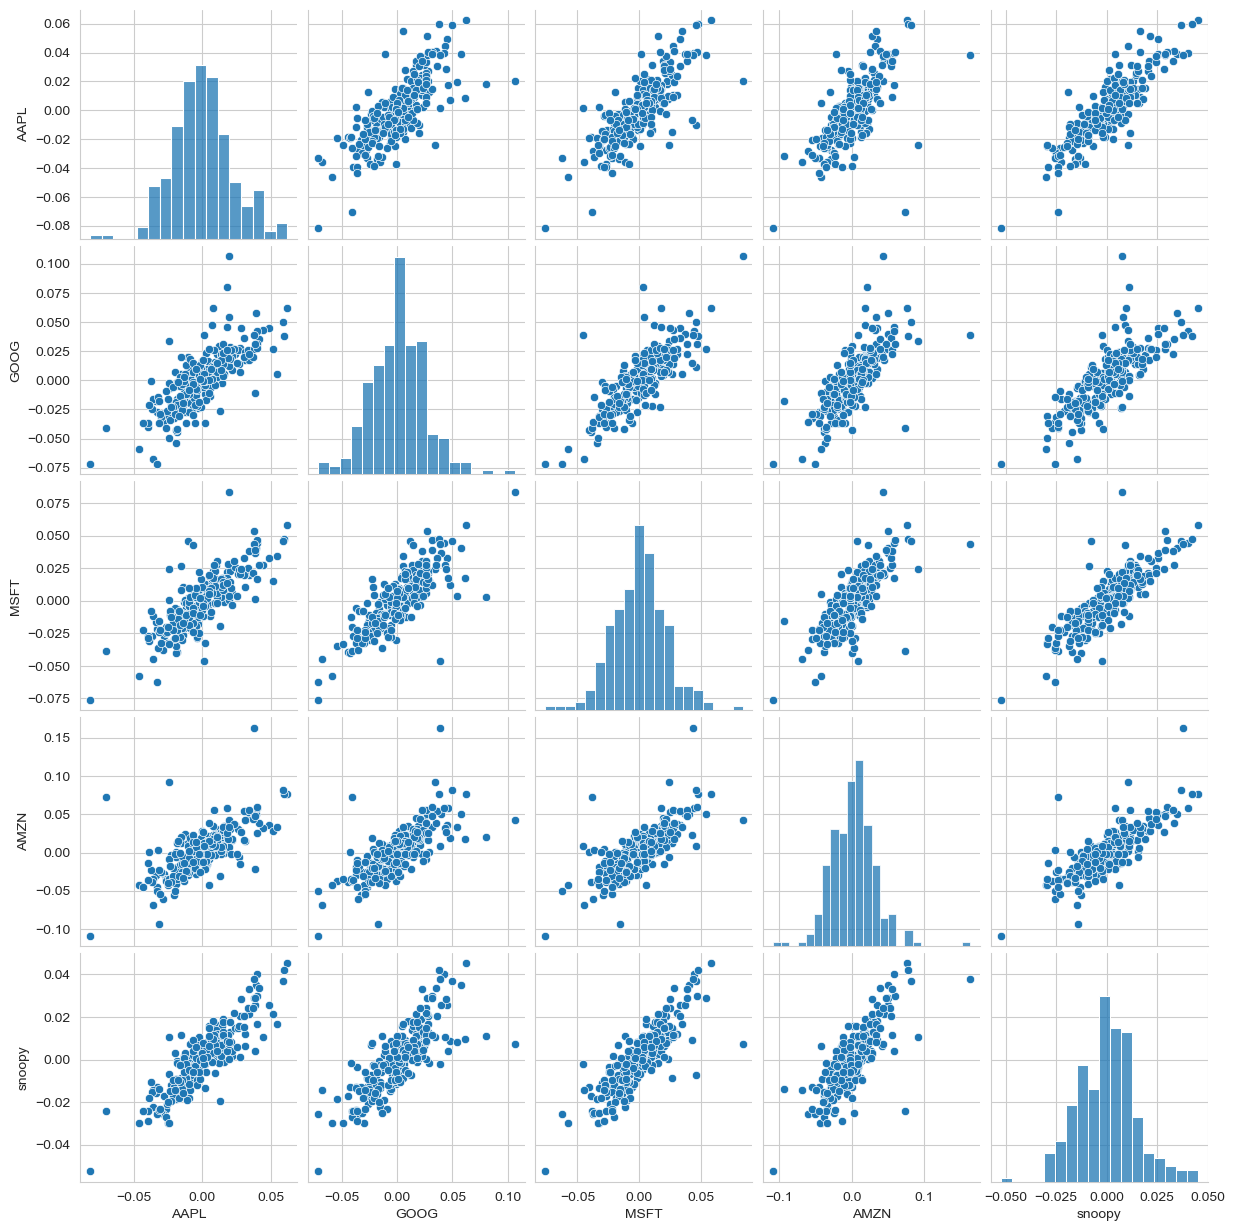

In [83]:
sns.pairplot(tech_rets.dropna())

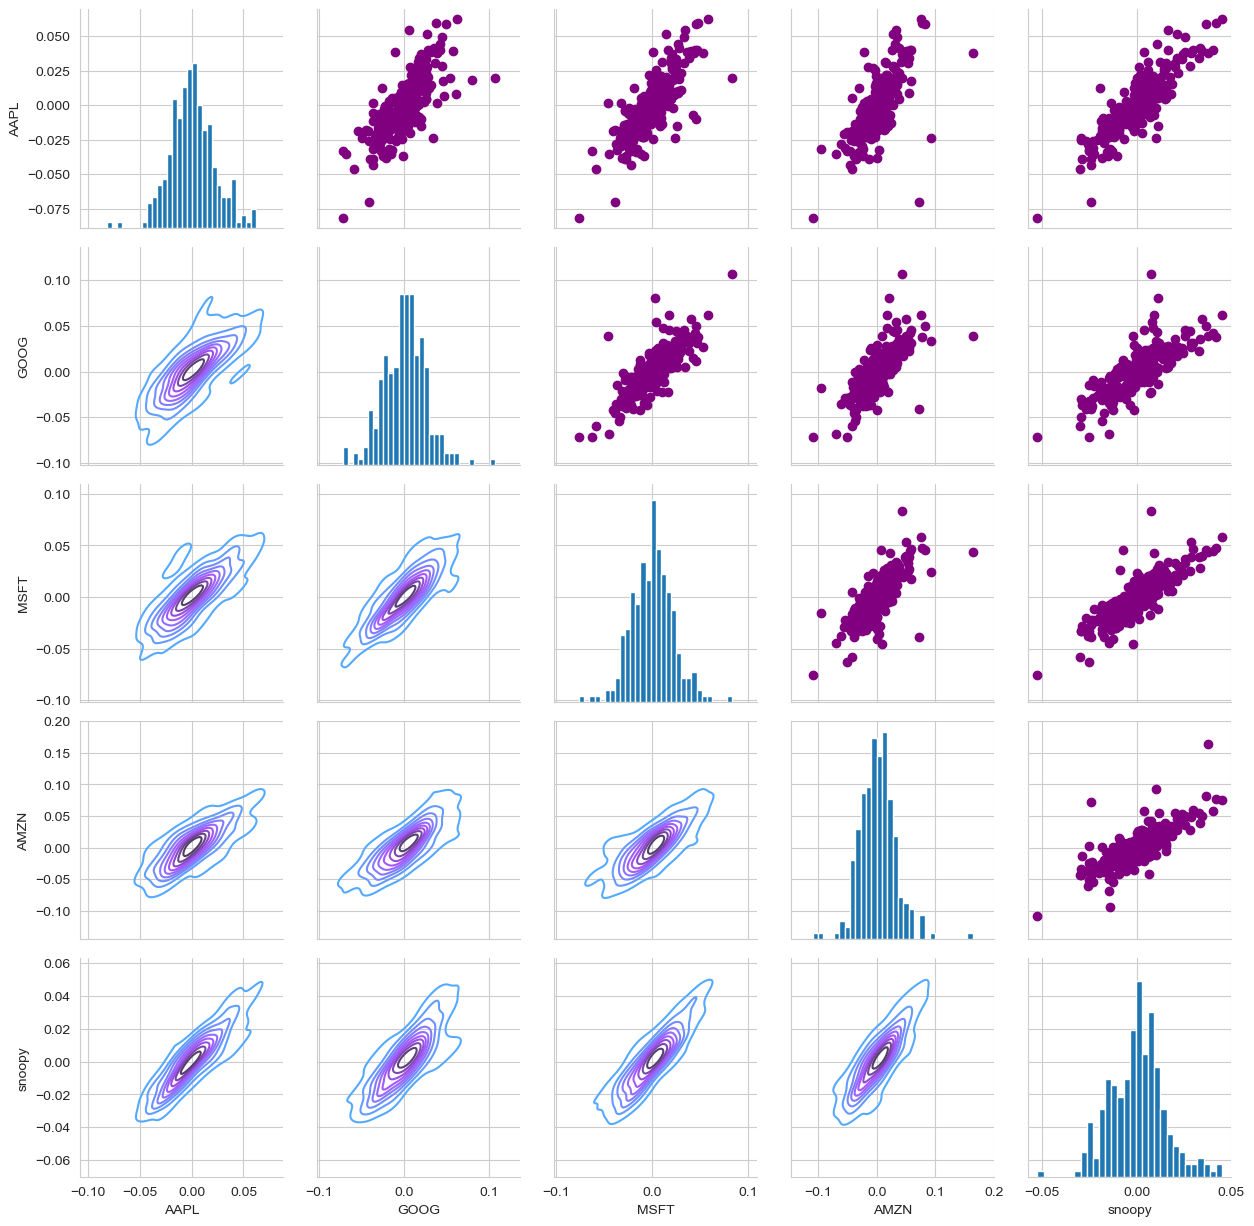

In [88]:
returns_fig=sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

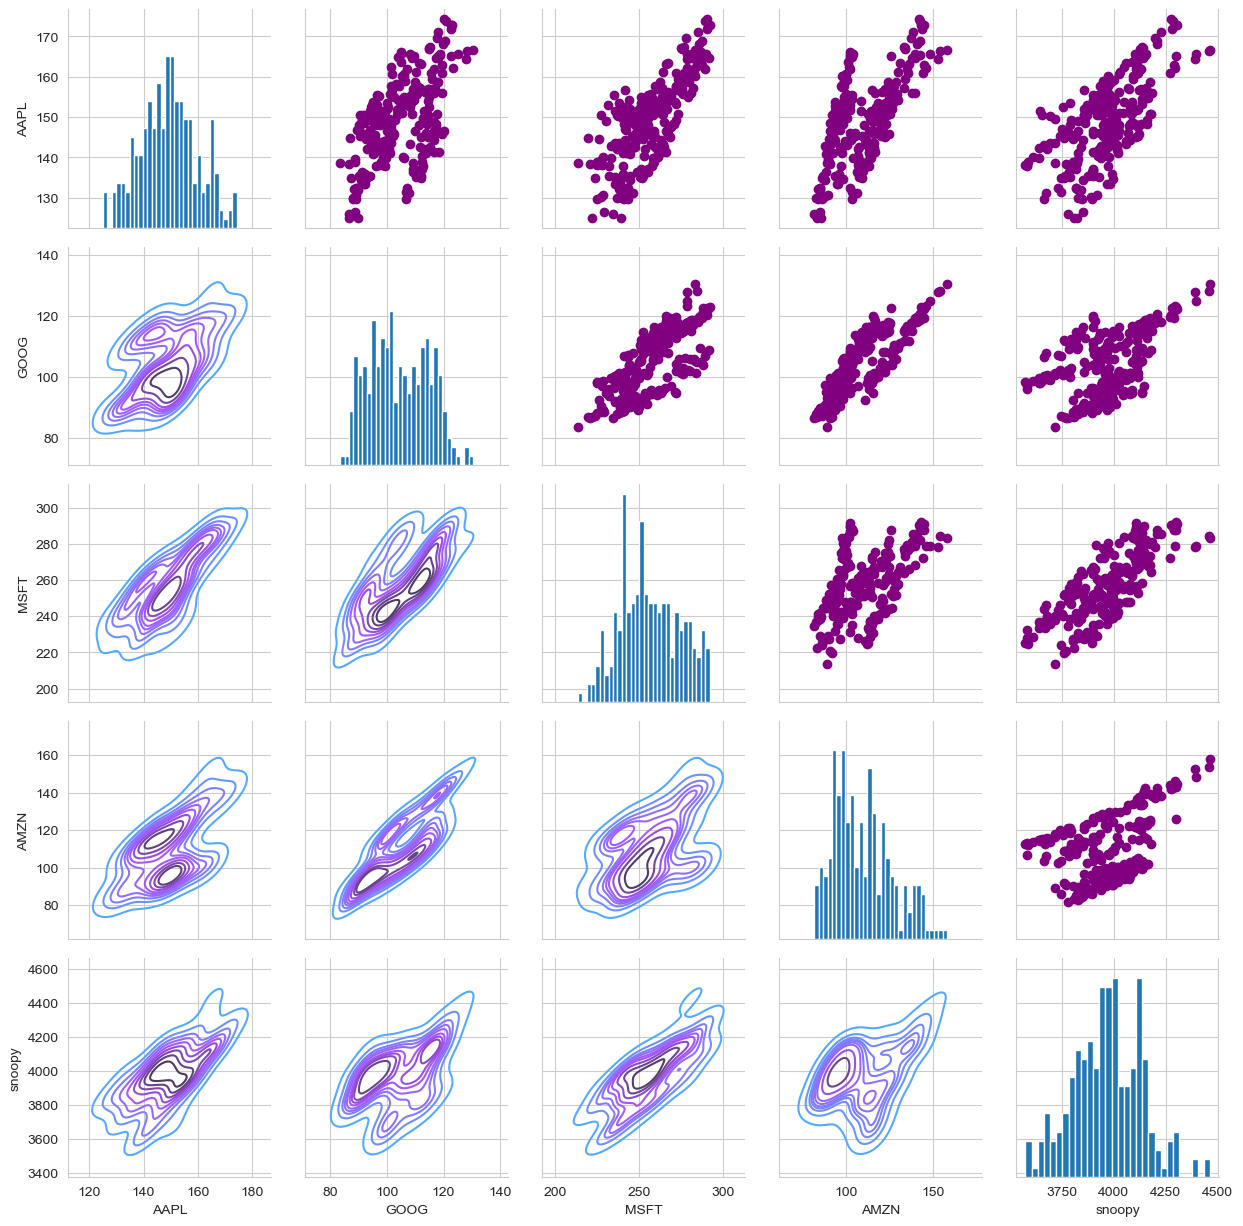

In [89]:

returns_fig=sns.PairGrid(closing_df.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

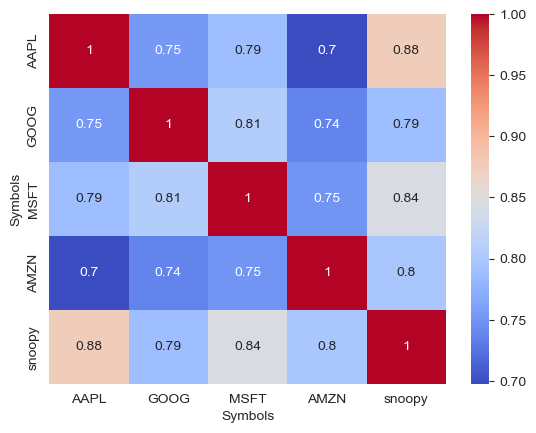

In [91]:
corr = tech_rets.corr()

sns.heatmap(corr, cmap='coolwarm', annot=True)

In [93]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN,snoopy
Date,,,,,
2023-04-14,NaN,NaN,NaN,NaN,NaN
2023-04-13,0.00,-0.01,0.01,-0.00,0.00
2023-04-12,-0.03,-0.03,-0.02,-0.04,-0.01
2023-04-11,0.00,0.01,-0.00,0.02,0.00
2023-04-10,0.01,0.01,0.02,0.02,0.00


In [96]:
rets=tech_rets.dropna()

TypeError: 'method' object is not iterable

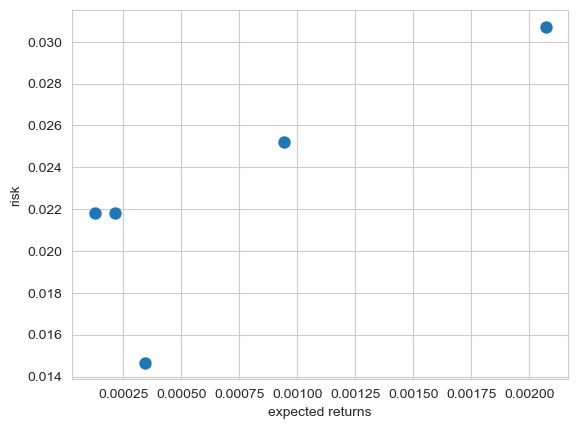

In [114]:
area=np.pi*20
plt.scatter(rets.mean().tolist(),rets.std().tolist(),s=area)
plt.xlabel('expected returns')
plt.ylabel('risk')
for label,x,y in zip(rets.columns,rets.mean,rets.std()):
    plt.annotate(
        label,
        xy=(x,y),xytext=(50,50),
        textcoords='offset points', ha= 'right', va='bottom',
        arrowpros =dict(arrowstyle='-',connectionstyle='arc3,rad=-0.3'))

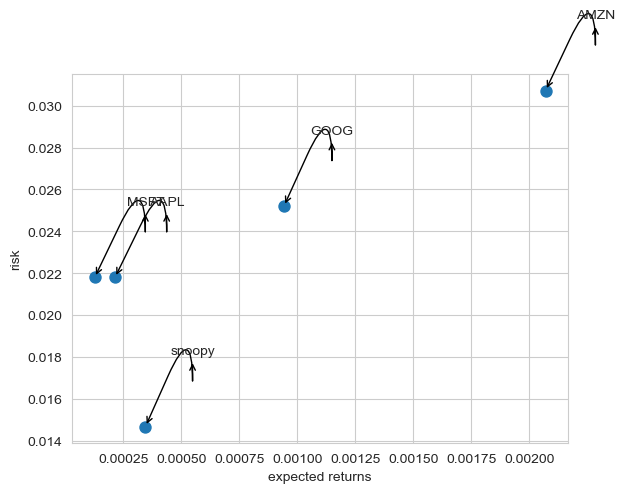

In [151]:
area=np.pi*20
plt.scatter(rets.mean().tolist(), rets.std().tolist(), s=area)
plt.xlabel('expected returns')
plt.ylabel('risk')
for label, x, y in zip(rets.columns, rets.mean().tolist(), rets.std().tolist()):
    plt.annotate(
        label,
        xy=(x,y),
        xytext=(50,50),
        textcoords='offset points',
        ha='right',
        va='bottom',
        arrowprops=dict(arrowstyle="<->", connectionstyle="arc,angleA=90,armA=30,rad=60",color='black')
    )


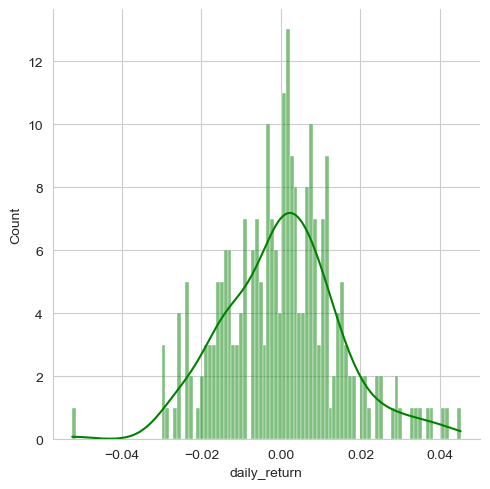

In [156]:
sns.displot(snoopy.daily_return.dropna(),bins=100,color='green',kde=True)

In [158]:
#ההחזר הכי גרוע ב5%  מהמקרים בשנה האחרונה עמד על 2.3% יומי 
rets.snoopy.quantile(0.05)

-0.023977669874781383

In [180]:
days=365
dt=1/365
nu=rets.mean()['snoopy']
sigma=rets.std()['snoopy']

In [181]:
def stock_monte_carlo(start_price,days,nu,sigma):
    price=np.zeros(days)
    price[0]=start_price
    shock=np.zeros(days)
    drift=np.zeros(days)
    for x in range(1,days):
        shock[x]=np.random.normal(loc=nu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x]=nu*dt
        price[x]=price[x-1]+(price[x-1]*(drift[x]+shock[x]))
    return price

In [182]:
snoopy.head()

,Open,High,Low,Close,Volume,MA for 10 days,MA for 20 days,MA for 30 days,daily_return
Date,,,,,,,,,
2023-04-14,4140.11,4163.19,4113.20,4137.64,2088608823.00,NaN,NaN,NaN,NaN
2023-04-13,4100.04,4150.26,4099.40,4146.22,2198579364.00,NaN,NaN,NaN,0.00
2023-04-12,4121.72,4134.37,4086.94,4091.95,2249009085.00,NaN,NaN,NaN,-0.01
2023-04-11,4110.29,4124.26,4102.61,4108.94,2000949147.00,NaN,NaN,NaN,0.00
2023-04-10,4085.20,4109.50,4072.55,4109.11,1951641661.00,NaN,NaN,NaN,0.00


Text(0.5, 1.0, 'monte carlo snoopy')

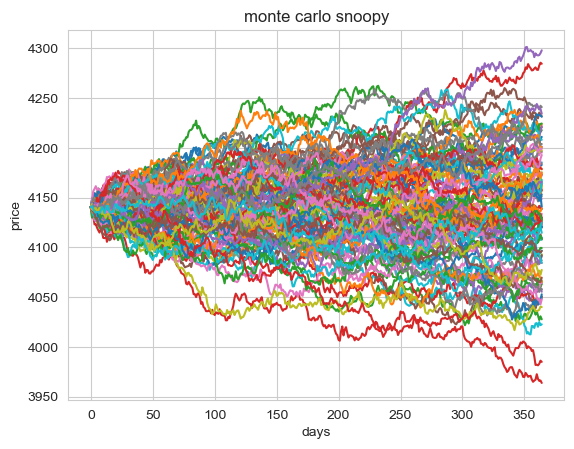

In [183]:
start_price=4140.11
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,nu,sigma))
    
plt.xlabel('days')
plt.ylabel('price')

plt.title('monte carlo snoopy')

In [185]:
runs=10000


simulations=np.zeros(runs)
for run in range(runs):
    simulations[run]=stock_monte_carlo(start_price,days,nu,sigma)[days-1]

TypeError: 'int' object is not callable

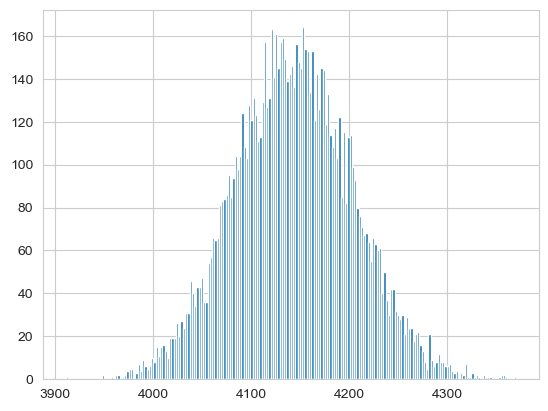

In [195]:
q=np.percentile(simulations,1)
plt.hist(simulations,bins=200)
#plt.figtext=0


# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price dis tribution for Google Stock after %s days" % days, weight='bold');